<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y gensim

Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Successfully uninstalled gensim-3.6.0


In [2]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 2.5 kB/s 


In [3]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pprint
import pandas as pd
import numpy as np

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
print(gensim.__version__)

4.1.2


# Initialization

## Download the Data

Full chords:

In [7]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y' -O input_seq.txt

--2021-11-04 08:32:56--  https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y
Resolving docs.google.com (docs.google.com)... 64.233.189.113, 64.233.189.139, 64.233.189.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3e3bnjdbq4vk9ejdvda3rbko3n5nvlo4/1636014750000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download [following]
--2021-11-04 08:32:56--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3e3bnjdbq4vk9ejdvda3rbko3n5nvlo4/1636014750000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14-4c-d

Simplified chords:

In [9]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fRbL2qj3eMHUsvnLbrn_ah6bOU58RaJ_' -O input_seq.txt

--2021-11-04 08:33:36--  https://docs.google.com/uc?export=download&id=1fRbL2qj3eMHUsvnLbrn_ah6bOU58RaJ_
Resolving docs.google.com (docs.google.com)... 64.233.189.138, 64.233.189.100, 64.233.189.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/be0kelsvhf0lc7rcl03gndors13ffg2r/1636014750000/14329102864480165501/*/1fRbL2qj3eMHUsvnLbrn_ah6bOU58RaJ_?e=download [following]
--2021-11-04 08:33:36--  https://doc-10-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/be0kelsvhf0lc7rcl03gndors13ffg2r/1636014750000/14329102864480165501/*/1fRbL2qj3eMHUsvnLbrn_ah6bOU58RaJ_?e=download
Resolving doc-10-4c-docs.googleusercontent.com (doc-10-4c-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-10-4c-docs.googleusercontent.com (doc-10-4c-d

Meta Data:

In [10]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S' -O input_meta.csv

--2021-11-04 08:33:40--  https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S
Resolving docs.google.com (docs.google.com)... 64.233.189.100, 64.233.189.113, 64.233.189.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eiesv8e2qbbqreacs1cqeppar7oj3a7l/1636014750000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download [following]
--2021-11-04 08:33:40--  https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eiesv8e2qbbqreacs1cqeppar7oj3a7l/1636014750000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download
Resolving doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-d

In [11]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [12]:
data = [line.split(' ') for line in lines]

### Meta Data

In [14]:
meta = pd.read_csv('input_meta.csv', sep='\t')

In [15]:
titles = meta.loc[:, ['id', 'title']].drop_duplicates()
titles.set_index('id', inplace=True)

In [16]:
assert len(data) == len(titles)

# Word Embeddings

In [18]:
from gensim.models import word2vec


In [27]:
# train model
model = gensim.models.Word2Vec(data, 
                               min_count=1,
                               sample=0.1,
                               sg=1,
                               window=3,
                               negative=5,
                               epochs=50,
                               alpha=0.025,
                               )

2021-11-04 08:44:25,583 : INFO : collecting all words and their counts
2021-11-04 08:44:25,588 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-04 08:44:25,613 : INFO : collected 159 word types from a corpus of 93630 raw words and 2046 sentences
2021-11-04 08:44:25,615 : INFO : Creating a fresh vocabulary
2021-11-04 08:44:25,618 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 159 unique words (100.0%% of original 159, drops 0)', 'datetime': '2021-11-04T08:44:25.618030', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-11-04 08:44:25,623 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 93630 word corpus (100.0%% of original 93630, drops 0)', 'datetime': '2021-11-04T08:44:25.623419', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform':

In [29]:
# summarize vocabulary
words = model.wv.index_to_key
print(words)

['G7', 'C', 'Dm7', 'CM7', 'A7', 'D7', 'Am7', 'C7', 'E7', 'C6', 'F', 'Em7', 'Am', 'F7', 'FM7', 'Bb7', 'B7', 'Gm7', 'G#7', 'G', 'Bm7b5', 'Fm7', 'Dm', 'Eb7', 'Fm', 'F#m7b5', 'Ebdim7', 'C#7', 'Em7b5', 'Bm7', 'F#m7', 'F#7', 'Cm7', 'Em', 'G#M7', 'F6', 'BbM7', 'Am6', 'Fm6', 'Ebm7', 'Dm7b5', 'EbM7', 'C#M7', 'F#dim7', 'Bbm7', 'EM7', 'C#dim7', 'Ebdim', 'C#m7', 'GM7', 'F#dim', 'Cdim', 'AM7', 'Cm', 'E', 'G13', 'D', 'DM7', 'C#dim', 'Bb', 'G#m7', 'G#', 'BM7', 'Dm6', 'A', 'Cdim7', 'Eb', 'Gm', 'F#M7', 'D13', 'C13', 'Am7b5', 'AmM7', 'G6', 'Gdim', 'B', 'C#', 'Bb13', 'G7(+b5)', 'F13', 'G#dim7', 'G#13', 'C#m7b5', 'Bm', 'E6', 'FmM7', 'E13', 'Fdim7', 'E7(+b5)', 'G#dim', 'Bb6', 'F#7(+b5)', 'Gm7b5', 'Cm6', 'F#', 'A7(+b5)', 'B7(+b5)', 'G#m7b5', 'Gm6', 'A6', 'B13', 'Eb13', 'A13', 'C#m', 'Eb6', 'Edim7', 'D6', 'Bb7(+b5)', 'C#7(+b5)', 'F#13', 'Fdim', 'Adim7', 'DmM7', 'Gdim7', 'Fm7b5', 'CmM7', 'Bbm', 'G#6', 'Ebm6', 'Adim', 'D7(+b5)', 'Em6', 'Bbm6', 'C#13', 'Bdim', 'Bbm7b5', 'C7(+b5)', 'Ebm', 'C#6', 'Bbdim7', 'Ebm7b

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

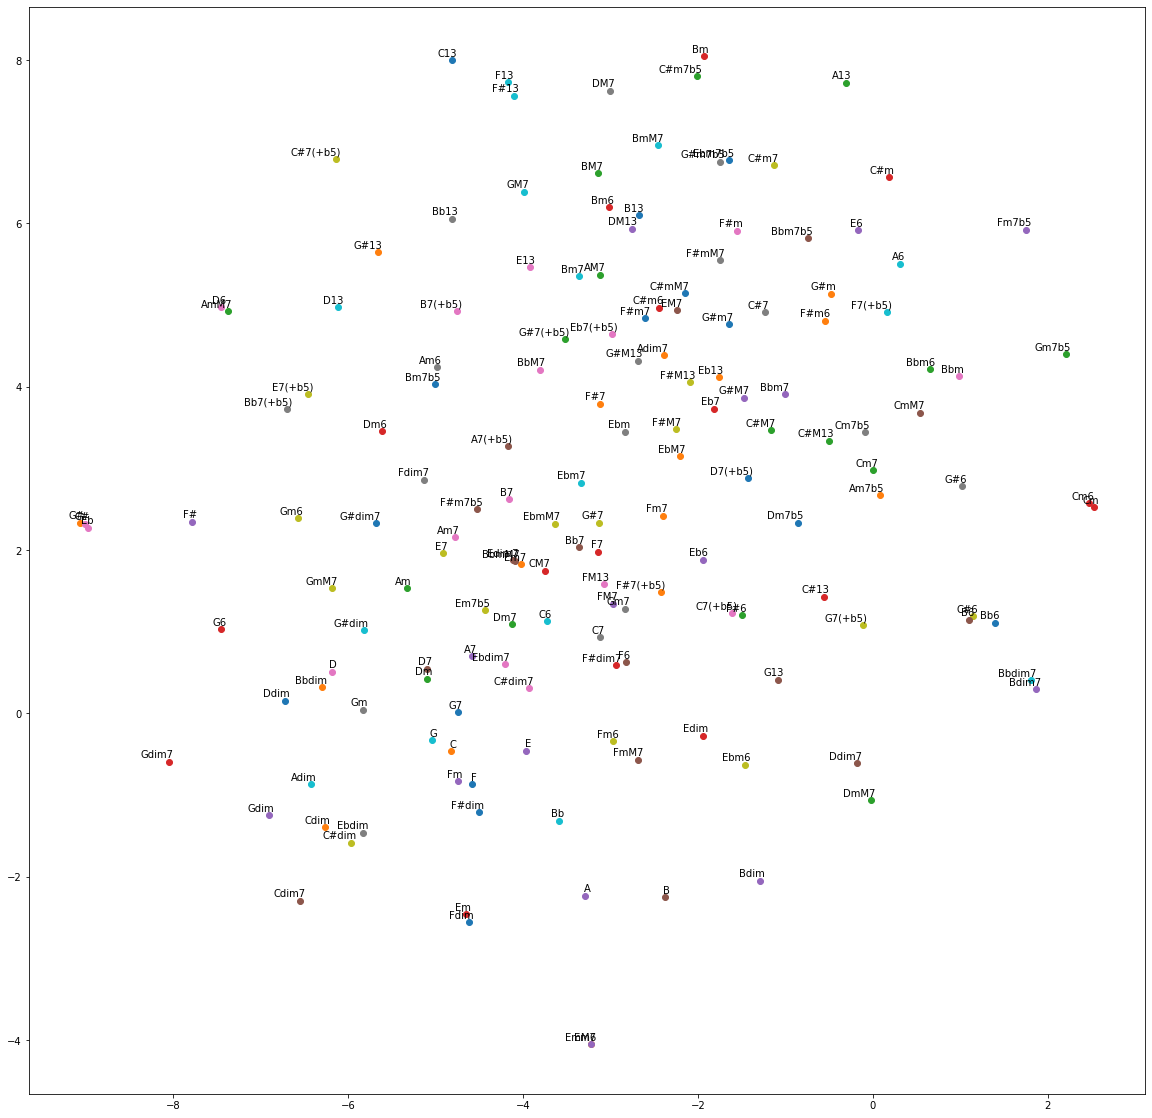

In [33]:
tsne_plot(model)